In [1]:
import pandas as pd

df = pd.read_excel("raw_em_dat.xlsx")

df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [2]:
df[df['Last Update'] == df['Last Update'].max()][['ISO', 'Disaster Type', "Total Deaths", "No. Injured", "No. Affected", "Total Affected", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day", "Entry Date", "Last Update"]]

,ISO,Disaster Type,Total Deaths,No. Injured,No. Affected,Total Affected,Start Year,Start Month,Start Day,End Year,End Month,End Day,Entry Date,Last Update
15285,SVN,Flood,6.0,NaN,1500120.0,1500120.0,2023,8.0,3.0,2023,8.0,4.0,2023-08-04,2025-04-03
16092,USA,Wildfire,30.0,NaN,NaN,NaN,2025,1.0,6.0,2025,1.0,23.0,2025-01-09,2025-04-03
16178,KOR,Wildfire,31.0,44.0,12045.0,12089.0,2025,3.0,21.0,2025,3.0,25.0,2025-03-25,2025-04-03
16183,MMR,Earthquake,3426.0,4715.0,15200000.0,15204715.0,2025,3.0,28.0,2025,3.0,28.0,2025-03-28,2025-04-03
16184,THA,Earthquake,20.0,35.0,2313.0,2348.0,2025,3.0,28.0,2025,3.0,28.0,2025-03-28,2025-04-03


In [3]:
df.shape

(16188, 46)

In [4]:
len(df[df["Disaster Group"] == "Natural"]) ##will keep all types of disasters to have more disaster data with people affected

10291

In [5]:
df.dtypes

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   

In [7]:
#Filtering relevant features (total affected = No. Affected + No. Injured, so removing to avoid colinearity)
df = df[["ISO", "Country", "Disaster Type", "Total Deaths", "No. Injured", "No. Affected", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day", "Entry Date", "Last Update"]]

In [8]:
df.isnull().sum()

ISO                  0
Country              0
Disaster Type        0
Total Deaths      3163
No. Injured      10180
No. Affected      8696
Start Year           0
Start Month         69
Start Day         1570
End Year             0
End Month          163
End Day           1498
Entry Date           0
Last Update          0
dtype: int64

In [ ]:
# Fill Start Month with End Month if available
df['Start Month'] = df['Start Month'].fillna(df['End Month'])

# Fill End Month with Start Month if available
df['End Month'] = df['End Month'].fillna(df['Start Month'])

# Fill remaining NaNs with 1
df['Start Month'] = df['Start Month'].fillna(1)
df['End Month'] = df['End Month'].fillna(1)

In [10]:
# Fill Start Day with End Day if available
df['Start Day'] = df['Start Day'].fillna(df['End Day'])

# Fill End Day with Start Day if available
df['End Day'] = df['End Day'].fillna(df['Start Day'])

# Fill remaining NaNs with 1
df['Start Day'] = df['Start Day'].fillna(1)
df['End Day'] = df['End Day'].fillna(1)

In [11]:
df.isnull().sum()

ISO                  0
Country              0
Disaster Type        0
Total Deaths      3163
No. Injured      10180
No. Affected      8696
Start Year           0
Start Month          0
Start Day            0
End Year             0
End Month            0
End Day              0
Entry Date           0
Last Update          0
dtype: int64

In [12]:
# Define condition: all three columns are NaN
mask = df[['Total Deaths', 'No. Injured', 'No. Affected']].isna().all(axis=1)

# Fill only those rows with 0 in the specified columns
df.loc[mask, ['Total Deaths', 'No. Injured', 'No. Affected']] = 0

In [13]:
df.isnull().sum()

ISO                 0
Country             0
Disaster Type       0
Total Deaths     2427
No. Injured      9444
No. Affected     7960
Start Year          0
Start Month         0
Start Day           0
End Year            0
End Month           0
End Day             0
Entry Date          0
Last Update         0
dtype: int64

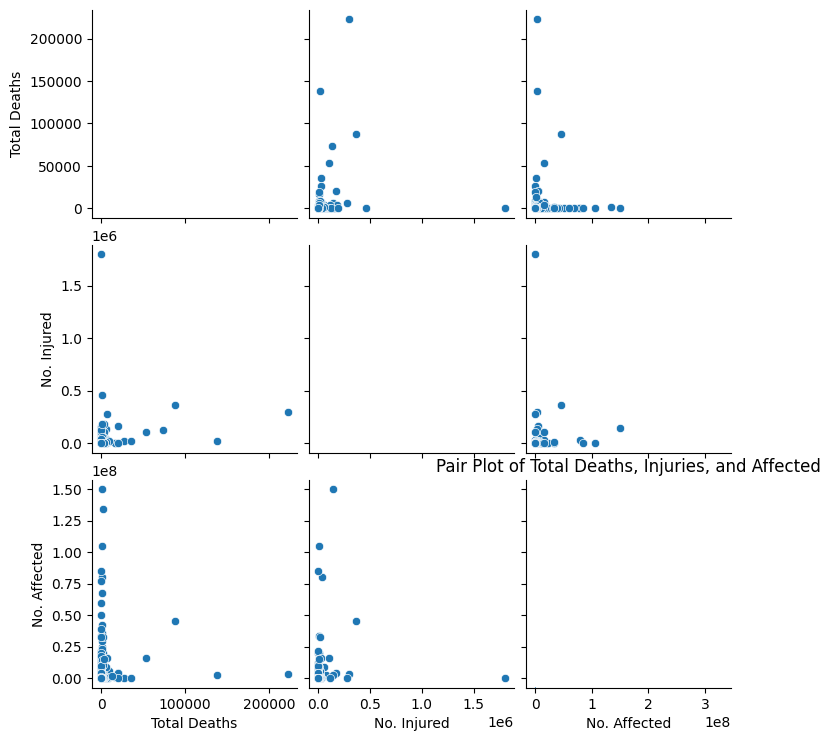

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Total Deaths', 'No. Injured', 'No. Affected']])
plt.title('Pair Plot of Total Deaths, Injuries, and Affected')
plt.show()


In [14]:
mask = df['Total Deaths'] > 1
len(df[mask & df['No. Injured'].isna()])

7094

In [15]:
mask = df['Total Deaths'] > 1
len(df[mask & df['No. Affected'].isna()])

7404

In [16]:
# Calculate the percentage of No. Injured to Total Deaths for existing values
#injured_percentage = df.loc[df['No. Injured'].notna(), 'No. Injured'] / df.loc[df['No. Injured'].notna(), 'Total Deaths']

# Use the mean of the percentages to fill missing values in 'No. Injured'
#avg_injured_percentage = injured_percentage.mean()

#print(avg_injured_percentage)

#df['No. Injured'] = df['No. Injured'].fillna((df['Total Deaths'] * avg_injured_percentage).round())


In [17]:
# Calculate the percentage of No. Affected to Total Deaths for existing values
#affected_percentage = df.loc[df['No. Affected'].notna(), 'No. Affected'] / df.loc[df['No. Affected'].notna(), 'Total Deaths']

# Use the mean of the percentages to fill missing values in 'No. Affected'
#avg_affected_percentage = affected_percentage.mean()
#print(avg_affected_percentage)

#df['No. Affected'] = df['No. Affected'].fillna((df['Total Deaths'] * avg_affected_percentage).round())


In [16]:
# Using Interpolation? TBD
#df[['Total Deaths', 'No. Injured', 'No. Affected']] = df[['Total Deaths', 'No. Injured', 'No. Affected']].interpolate(method='linear')

#Fill remaining with 0
df['No. Injured'] = df['No. Injured'].fillna(0).astype(int)
df['No. Affected'] = df['No. Affected'].fillna(0).astype(int)
df['Total Deaths'] = df['Total Deaths'].fillna(0).astype(int)

In [17]:
df.isnull().sum()

ISO              0
Country          0
Disaster Type    0
Total Deaths     0
No. Injured      0
No. Affected     0
Start Year       0
Start Month      0
Start Day        0
End Year         0
End Month        0
End Day          0
Entry Date       0
Last Update      0
dtype: int64

In [19]:
df.shape

(16188, 14)

In [20]:
df.to_csv("cleaned_em_dat.csv", index=False)